In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
tweets = pd.read_csv("Twitter_data.csv",encoding='latin-1', names = ['label','id','date','noquery','handler','tweet'])

In [17]:
tweets.head()

,label,id,date,noquery,handler,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
label      1048576 non-null int64
id         1048576 non-null int64
date       1048576 non-null object
noquery    1048576 non-null object
handler    1048576 non-null object
tweet      1048576 non-null object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [19]:
tweets.drop(['id', 'date','noquery','handler'], axis=1, inplace=True)

In [20]:
tweets.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [23]:
tweets.groupby('label').describe()

tweet                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
4      248576  246727              Good morning    43

In [25]:
tweets['length'] = tweets['tweet'].apply(len)
tweets.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [27]:
tweets.length.describe()

count    1.048576e+06
mean     7.429772e+01
std      3.660257e+01
min      6.000000e+00
25%      4.400000e+01
50%      7.000000e+01
75%      1.040000e+02
max      3.590000e+02
Name: length, dtype: float64

In [29]:
tweets[tweets['length'] == 359]['tweet']

380539    @neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...
Name: tweet, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CE64E8BE0>,
      dtype=object)

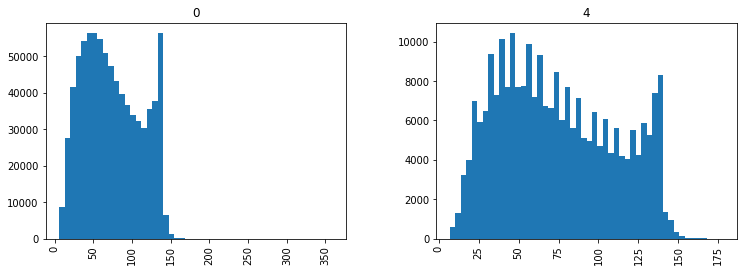

In [30]:
tweets.hist(column='length', by='label', bins=50,figsize=(12,4))

### Now we will divide the data into testing and training set - with 70% of the data in training and 30% of data in testing set

In [31]:
from nltk.stem import WordNetLemmatizer
#
#  Input : dataframe with a column names 'text' which contains raw tweets (one per row)
#  Output: A list of lists of tokens corrsponding to the 'text' column
#
def tokenize_tweets2(tweets):
    """Given a df with tweets in 'text' col, this function return tokens as a list of lists"""

    # apply tokenize to the 'text' coolumn in the tweets df
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tweets['tweet'].apply(tweet_tokenizer.tokenize)
    
    # filter
    misc = ['rt', '’', '…', '—', 'u', '”', 'w', '“', '...', '️', 'http', 'https']
    to_remove = nltk.corpus.stopwords.words('English') + list(string.punctuation) + misc
    
    lemmatizer = WordNetLemmatizer()
    
    tokens = [[lemmatizer.lemmatize(token) for token in tw if token not in to_remove] for tw in tokens]      
    return(tokens)

In [32]:
all_tokens = tokenize_tweets2(tweets)
print(len(all_tokens))
all_tokens[:10]

1048576


[['http://twitpic.com/2y1zl',
  'awww',
  "that's",
  'bummer',
  'shoulda',
  'got',
  'david',
  'carr',
  'third',
  'day',
  ';D'],
 ['upset',
  "can't",
  'update',
  'facebook',
  'texting',
  'might',
  'cry',
  'result',
  'school',
  'today',
  'also',
  'blah'],
 ['dived',
  'many',
  'time',
  'ball',
  'managed',
  'save',
  '50',
  'rest',
  'go',
  'bound'],
 ['whole', 'body', 'feel', 'itchy', 'like', 'fire'],
 ['behaving', "i'm", 'mad', "can't", 'see'],
 ['whole', 'crew'],
 ['need', 'hug'],
 ['hey',
  'long',
  'time',
  'see',
  'yes',
  '..',
  'rain',
  'bit',
  'bit',
  'lol',
  "i'm",
  'fine',
  'thanks',
  "how's"],
 ['nope'],
 ['que', 'muera']]

In [33]:
tweets['all_tokens']=all_tokens

In [34]:
tweets.head()

,label,tweet,length,all_tokens
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,"[http://twitpic.com/2y1zl, awww, that's, bumme..."
1,0,is upset that he can't update his Facebook by ...,111,"[upset, can't, update, facebook, texting, migh..."
2,0,@Kenichan I dived many times for the ball. Man...,89,"[dived, many, time, ball, managed, save, 50, r..."
3,0,my whole body feels itchy and like its on fire,47,"[whole, body, feel, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....",111,"[behaving, i'm, mad, can't, see]"


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
trainingSet, testSet = train_test_split(tweets, test_size=0.3, random_state=101)

In [37]:
trainingSet.head()

,label,tweet,length,all_tokens
83269,0,Ahh! My eye hurts I think I have a pretty ba...,55,"[ahh, eye, hurt, think, pretty, bad, stye]"
812876,4,@mistakepro i saw that a couple days ago... it...,79,"[saw, couple, day, ago, brought, tear, eye, haha]"
314739,0,#goodsex is with... i'm a whhore but a very...,61,"[#goodsex, i'm, whhore, skilled, one, =P]"
674102,0,sittin here eatin strawberries bored as hell,45,"[sittin, eatin, strawberry, bored, hell]"
1032986,4,"@ggadventures Wait, don't change *too* much. I...",69,"[wait, change, much, really, like]"


In [38]:
from collections import Counter

counts = Counter([token for tokens in all_tokens for token in tokens])
print(len(counts))
counts.most_common(20)

269228


[("i'm", 91762),
 ('day', 68648),
 ('..', 68099),
 ('get', 59344),
 ('go', 57073),
 ('work', 53788),
 ('like', 53397),
 ('good', 49338),
 ('today', 47181),
 ('going', 43069),
 ('time', 41814),
 ('got', 41510),
 ('back', 40334),
 ('want', 38347),
 ('really', 37346),
 ('one', 37229),
 ('im', 36467),
 ("can't", 35970),
 ('know', 35545),
 ('miss', 33747)]

In [50]:
top_words = [k for k in counts.keys() if counts.get(k) > 50]
len(top_words)

9192

### Taking 10% of the training set to do the initial feature matrix

In [12]:
# trainingSet_10percent = trainingSet.sample(frac = 0.01)